<a href="https://colab.research.google.com/github/nicanorjimenez/Midterm-Project/blob/main/LinAlg_Midterms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>Jimenez, Nicanor J.<br>
    201920022 <br>
   Wed 7:00-8:30 </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

State and explain Bebang's problem here and provide the deliverables.

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [235]:
import pandas as pd
#import the data into colab 
file_prices = "bebang prices.csv"
file_sales = "bebang sales.csv"

df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)


## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [236]:
## Let's check the sales dataframe
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


In [ ]:
df_sales.values

## Part 1: Monthly Sales

In [134]:
import numpy as np
### Vectorizing the data

sales_mat = np.array(df_sales.set_index('flavor'))

a = np.array(df_prices)[0] 
prices_mat = a.reshape((12,1))## reshaped the vector to the appropriate size
b = np.array(df_prices)[1] 
costs_mat = b.reshape((12,1))


## Do not alter these lines
print(sales_mat.shape)
print(prices_mat.shape)
print(costs_mat.shape)
# Expected Output
# (12, 12)
# (12, 1)
# (12, 1)

(12, 12)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [199]:
#Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales):
    monthly_revenue = np.multiply(sales_mat,prices_mat)
    monthly_costs = np.multiply(sales_mat,costs_mat)
    monthly_profits = np.subtract(monthly_revenue,monthly_costs)
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()

In [237]:
### Do not alter this cell
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)
### print the values
month_rev



array([160215,  68730, 198860,  64830, 143655,  71835, 116215,  66620,
       126250,  73355,  75295, 261125])

## Part 2: Flavor Sales

In [244]:
#Create a function that *returns* and prints the flavor profits for the whole year 
def flavor_sales(price, cost, sales):
    flavor_revenue = np.multiply(month_rev,prices_mat)
    flavor_costs = np.multiply(month_rev,costs_mat)
    flavor_profits = np.subtract(flavor_revenue,flavor_costs) 
    return flavor_profits.flatten()



In [248]:
### Do not alter this cell
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)
### print the values
print(flavor_profit)


[18175050]


In [246]:
### identify the best-selling and least-selling flavors. You can use np.sort() or np.argmax() for this.
sorted_prof = np.argsort(flavor_profit)
sort_prof = np.sort(flavor_profit)
n=3
best_rslt=sorted_prof[-n : ]


best_3_flavors = print(best_rslt)
worst_3_flavors = print(sorted_prof[:n])


[0]
[0]


## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [250]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

#### Entire Dataset

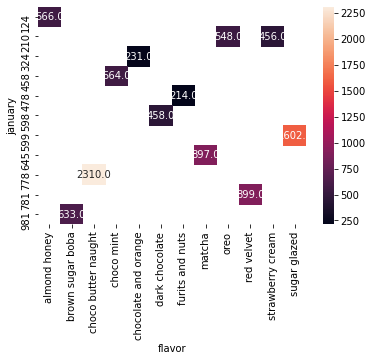

In [257]:
df = df_sales.pivot_table(index='january', columns='flavor', values='december', aggfunc=np.median)
sns.heatmap(df, annot=True, fmt=".1f")
plt.show()

#### Monthly Sales

AttributeError: ignored

#### Flavor Sales

In [251]:
sns.heatmap(flavor_profit.corr(), annot=True, fmt=".2f")
plt.show()

AttributeError: ignored

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

Add your statement here